In [2]:
!pip install pytesseract==0.3.9

In [3]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('/home/hifza/PycharmProjects/cotton/pass.png',0)
img_copy = img.copy()
img_canny = cv2.Canny(img_copy, 50, 100, apertureSize = 3)

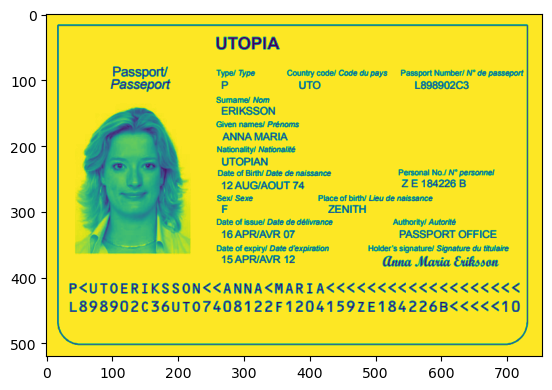

In [5]:
plt.imshow(img)

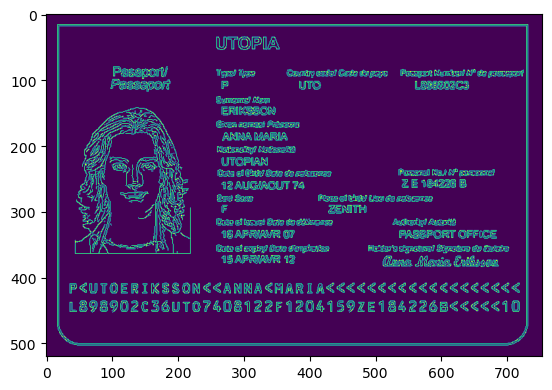

In [6]:
plt.imshow(img_canny)

In [7]:
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

In [8]:
#plt.imshow(img_hough)

In [9]:
(x, y, w, h) = (np.amin(img_hough, axis = 0)[0,0], np.amin(img_hough, axis = 0)[0,1], np.amax(img_hough, axis = 0)[0,0] - np.amin(img_hough, axis = 0)[0,0], np.amax(img_hough, axis = 0)[0,1] - np.amin(img_hough, axis = 0)[0,1])
img_roi = img_copy[y:y+h,x:x+w]

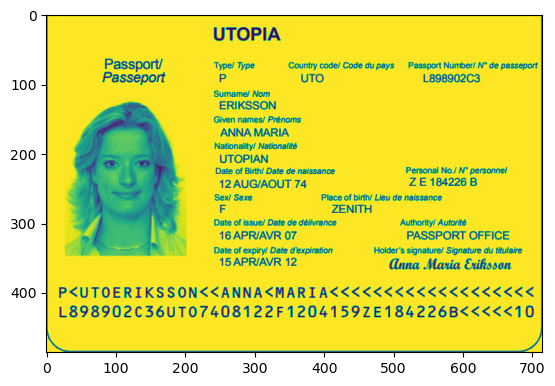

In [10]:
plt.imshow(img_roi)

In [11]:
#img_roi = cv2.rotate(img_roi, cv2.ROTATE_90_COUNTERCLOCKWISE)
(height, width) = img_roi.shape



img_roi_copy = img_roi.copy()
dim_mrz = (x, y, w, h) =(1, round(height*0.75), width-2, round(height-(height*0.75))-2)
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

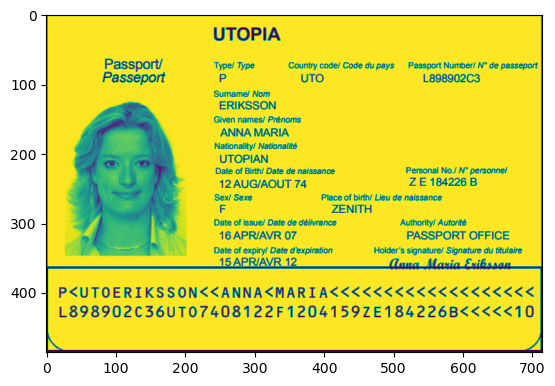

In [12]:
plt.imshow(img_roi_copy)

In [13]:
img_mrz = img_roi[y:y+h, x:x+w]
img_mrz =cv2.GaussianBlur(img_mrz, (3,3), 0)
ret, img_mrz = cv2.threshold(img_mrz,127,255,cv2.THRESH_TOZERO)

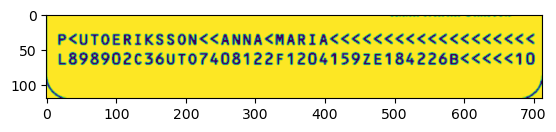

In [14]:
plt.imshow(img_mrz)

In [15]:
mrz = pytesseract.image_to_string(img_mrz, config = '--psm 12')
print(mrz)

P<UTOERIKSSON<<ANNAKMARIAK<<< << << KKK KK KKK KKK

L898902C36UT07408122F1204159ZE184226B<<<<<10

\

/



In [16]:
mrz = [line for line in mrz.split('\n') if len(line)>10]
if mrz[0][0:2] == 'P<':
  lastname = mrz[0].split('<')[1][3:]
else:
  lastname = mrz[0].split('<')[0][5:]
firstname = [i for i in mrz[0].split('<<') if (i).isspace() == 0 and len(i) > 0][1]
pp_no = mrz[1][:9]

In [17]:
print(firstname,lastname,pp_no)

ANNAKMARIAK ERIKSSON L898902C3
